## CLEAN Mask Visualisation

In [146]:
from astropy.io import fits
import matplotlib.pyplot as plt
#plt.rcParams['image.cmap'] = 'gist_earth'
import numpy as np

In [147]:
hdu_mask = fits.open("/home/richarms/code/spiel/runs/run_2018-08-14-16-04-48/results/1804-image-mask.fits")
mask_data = hdu_mask[0].data
mask_data = np.array(mask_data.reshape(mask_data.shape[0], mask_data.shape[2], mask_data.shape[3], mask_data.shape[1]), dtype=np.bool)
mask_data = np.concatenate((np.invert(mask_data),mask_data), axis=3)
mask_data.shape

(1, 512, 512, 2)

In [148]:
hdu_image = fits.open("/home/richarms/code/spiel/runs/run_2018-08-14-16-04-48/results/1804-wsclean-image.fits")
image_data=hdu_image[0].data
image_data = np.array(image_data.reshape(image_data.shape[0], image_data.shape[2], image_data.shape[3], image_data.shape[1]))
image_data.shape, mask_data.shape

((1, 512, 512, 1), (1, 512, 512, 2))

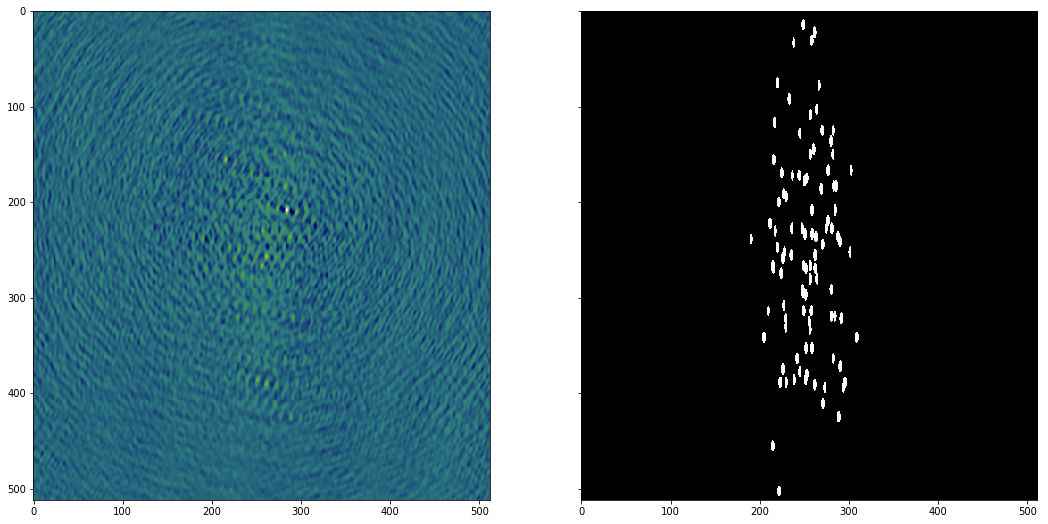

In [149]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(18,9))
ax[0].imshow(image_data[0,:,:,0], aspect="auto")
ax[1].imshow(mask_data[0,:,:,1], aspect="auto")

## Data preparation

tf_unet requires a set of image and corresponding label data of the same dimension (rank?)

In [129]:
from scripts.radio_util import DataProvider
from tf_unet import unet
from tf_unet import image_util
import glob

#psf_files = glob.glob('/home/richarms/code/spiel/runs/run_2018-08-14-16-04-48/results/*psf.fits')
#mask_files = glob.glob('/home/richarms/code/spiel/runs/run_2018-08-14-16-04-48/results/*mask.fits')
#image_files = glob.glob('/home/richarms/code/spiel/runs/run_2018-08-14-16-04-48/results/*image.fits')

find the required files in the trainign directory

## set up the data provider and unet


In [134]:
#data_provider = DataProvider(20, image_files)
data_provider = image_util.SimpleDataProvider(image_data, mask_data[...,0], channels=1, n_class=2)
x_test, y_test = data_provider(1)

In [135]:
net = unet.Unet(channels=data_provider.channels, n_class=data_provider.n_class, layers=3, features_root=16)

2018-08-16 14:56:06,375 Layers 3, features 16, filter size 3x3, pool size: 2x2


In [136]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

## training the network
only one epoch. For good results many more are neccessary

In [137]:
path = trainer.train(data_provider, "./unet_trained", training_iters=32, epochs=10, display_step=2)


2018-08-16 14:56:16,073 Removing '/data/richarms/code/tf_unet/demo/prediction'
2018-08-16 14:56:16,075 Removing '/data/richarms/code/tf_unet/demo/unet_trained'
2018-08-16 14:56:16,077 Allocating '/data/richarms/code/tf_unet/demo/prediction'
2018-08-16 14:56:16,078 Allocating '/data/richarms/code/tf_unet/demo/unet_trained'
2018-08-16 14:56:22,259 Verification error= 1.6%, loss= 0.6653
2018-08-16 14:56:23,365 Start optimization
2018-08-16 14:56:26,754 Iter 0, Minibatch Loss= 0.5592, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018-08-16 14:56:31,022 Iter 2, Minibatch Loss= 0.3559, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018-08-16 14:56:54,656 Iter 4, Minibatch Loss= 0.1412, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018-08-16 14:56:59,125 Iter 6, Minibatch Loss= 0.0856, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018-08-16 14:57:03,680 Iter 8, Minibatch Loss= 0.0830, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018-08-16 14:57:08,093 Iter 10, Minibatch Lo

2018-08-16 15:01:54,025 Iter 136, Minibatch Loss= 0.0807, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018-08-16 15:01:58,402 Iter 138, Minibatch Loss= 0.0807, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018-08-16 15:02:02,762 Iter 140, Minibatch Loss= 0.0807, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018-08-16 15:02:07,115 Iter 142, Minibatch Loss= 0.0806, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018-08-16 15:02:11,499 Iter 144, Minibatch Loss= 0.0806, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018-08-16 15:02:15,822 Iter 146, Minibatch Loss= 0.0806, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018-08-16 15:02:20,262 Iter 148, Minibatch Loss= 0.0805, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018-08-16 15:02:24,559 Iter 150, Minibatch Loss= 0.0805, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018-08-16 15:02:28,847 Iter 152, Minibatch Loss= 0.0805, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018-08-16 15:02:33,111 Iter 154, Min

2018-08-16 15:07:18,543 Iter 280, Minibatch Loss= 0.0776, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018-08-16 15:07:22,933 Iter 282, Minibatch Loss= 0.0775, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018-08-16 15:07:27,279 Iter 284, Minibatch Loss= 0.0775, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018-08-16 15:07:31,423 Iter 286, Minibatch Loss= 0.0774, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018-08-16 15:07:33,357 Epoch 8, Average loss: 0.0832, learning rate: 0.1327
2018-08-16 15:07:35,728 Verification error= 1.6%, loss= 0.0774
2018-08-16 15:07:38,992 Iter 288, Minibatch Loss= 0.0774, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018-08-16 15:07:43,450 Iter 290, Minibatch Loss= 0.0773, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018-08-16 15:07:47,851 Iter 292, Minibatch Loss= 0.0773, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018-08-16 15:07:52,018 Iter 294, Minibatch Loss= 0.0772, Training Accuracy= 0.9840, Minibatch error= 1.6%
2018

In [138]:
x_test, y_test = data_provider(1)

prediction = net.predict("./unet_trained/model.ckpt", x_test)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2018-08-16 15:13:35,483 Restoring parameters from ./unet_trained/model.ckpt
2018-08-16 15:13:35,576 Model restored from file: ./unet_trained/model.ckpt


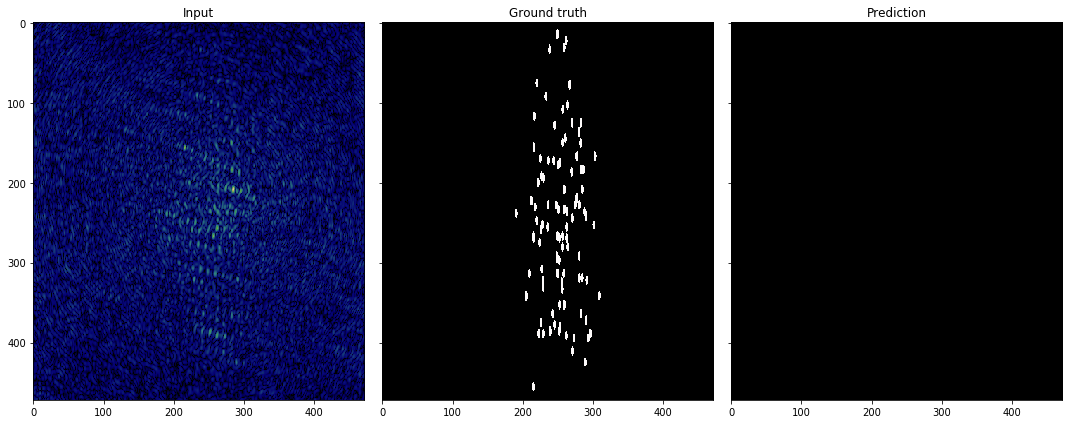

In [145]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,6))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,0], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()

## Tensorflow Usage

In [ ]:
from tf_unet import unet, util, image_util

#preparing data loading
data_provider = image_util.ImageDataProvider("fishes/train/*.tif")

#setup & training
net = unet.Unet(layers=3, features_root=64, channels=1, n_class=2)
trainer = unet.Trainer(net)
path = trainer.train(data_provider, output_path, training_iters=32, epochs=100)

#verification
...

prediction = net.predict(path, data)

unet.error_rate(prediction, util.crop_to_shape(label, prediction.shape))

img = util.combine_img_prediction(data, label, prediction)
util.save_image(img, "prediction.jpg")